# Aula 4.9 – Lidando com Valores Ausentes

## 🧠 Por que os dados faltam?
- Problemas técnicos: falha no sistema ou coleta incompleta
- Dados não aplicáveis: ex. número de filhos para pessoas sem filhos
- Omissões humanas: erros ou esquecimento ao preencher

É comum! O importante é **saber lidar com isso corretamente.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulando um DataFrame com valores ausentes
df = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Edu'],
    'idade': [25, np.nan, 35, 40, np.nan],
    'cidade': ['SP', 'RJ', np.nan, 'MG', 'BA'],
    'salario': [3000, 4500, np.nan, 5000, 5200]
})
df

,nome,idade,cidade,salario
0,Ana,25.0,SP,3000.0
1,Bruno,NaN,RJ,4500.0
2,Carlos,35.0,NaN,NaN
3,Diana,40.0,MG,5000.0
4,Edu,NaN,BA,5200.0


## 🔍 Identificando valores ausentes

In [2]:
# Verificar onde há valores ausentes
df.isna()

,nome,idade,cidade,salario
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [3]:
# Contar valores ausentes por coluna
df.isna().sum()

,0
nome,0
idade,2
cidade,1
salario,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     5 non-null      object 
 1   idade    3 non-null      float64
 2   cidade   4 non-null      object 
 3   salario  4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


## 🗺️ Visualizando com Heatmap

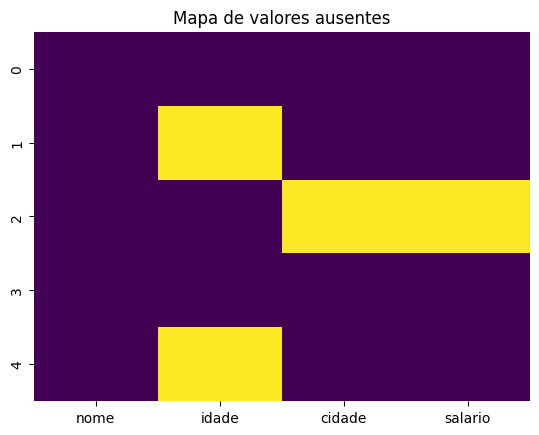

In [4]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Mapa de valores ausentes")
plt.show()

## 🛠️ Como tratar valores ausentes?

### 1. **Remover** linhas ou colunas (<5% das linhas)

In [5]:
df_dropped = df.dropna()
df_dropped

,nome,idade,cidade,salario
0,Ana,25.0,SP,3000.0
3,Diana,40.0,MG,5000.0


### 2. **Preencher com média, mediana ou valor fixo**

In [11]:
# Preencher idade com a média
df_fill_mean = df.copy()
df_fill_mean['idade'] = df_fill_mean['idade'].fillna(df_fill_mean['idade'].mean())
df_fill_mean

,nome,idade,cidade,salario
0,Ana,25.000000,SP,3000.0
1,Bruno,33.333333,RJ,4500.0
2,Carlos,35.000000,NaN,NaN
3,Diana,40.000000,MG,5000.0
4,Edu,33.333333,BA,5200.0


In [12]:
# Preencher idade com a média
df_fill_fixo = df.copy()
df_fill_fixo['idade'] = df_fill_fixo['idade'].fillna(30)
df_fill_fixo

,nome,idade,cidade,salario
0,Ana,25.0,SP,3000.0
1,Bruno,30.0,RJ,4500.0
2,Carlos,35.0,NaN,NaN
3,Diana,40.0,MG,5000.0
4,Edu,30.0,BA,5200.0


### 3. **Forward fill e Backward fill**
- Preenche com o valor anterior ou posterior.

In [ ]:
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')
df_ffill, df_bfill

## 📊 Como decidir o que fazer?

| Critério             | Quando usar                          |
|----------------------|---------------------------------------|
| % de valores ausentes | Se for > 50%, pode remover a coluna |
| Importância da coluna| Se for irrelevante, pode remover     |
| Tipo de análise      | Modelos exigem dados completos       |
| Contexto do negócio  | Sempre avaliar o impacto             |

> Não existe solução mágica...

## 🎯 Atividade prática

1. Calcule a porcentagem de valores ausentes por coluna.
2. Remova colunas com + de 50% de nulos.
3. Preencha as demais com valores apropriados.

In [ ]:
porcentagem_nulos = df.isna().mean() * 100
print(porcentagem_nulos)

# Remover colunas com mais de 50% de nulos
df_filtrado = df.loc[:, porcentagem_nulos < 50]

# Preencher as restantes com forward fill
df_final = df_filtrado.fillna(method='ffill')
df_final

## ✅ Conclusão
- Valores ausentes são normais, e saber tratá-los é essencial.
- Explore, visualize e aplique diferentes técnicas.
- Sempre use critérios com base em negócio + proporção de nulos.